Plotting/Analysis of Data
-------------------------
Now possible on private machines by utilizing `bigjson` package to budget memory

In [2]:
# Installs
!cythonize -i *.pyx --force # this should be done for each user as different headers might be used for different py versions
#!pip install git+http://github.com/aarjaneiro/parallelqueue@cythonized
#!pip install bokeh
#!pip install bigjson 

[1/1] Cythonizing /home/ajst/PycharmProjects/RedundancyPaper/Analysis/datahelpers.pyx
running build_ext
building 'datahelpers' extension
creating /home/ajst/PycharmProjects/RedundancyPaper/Analysis/tmp_w8yiks_/home
creating /home/ajst/PycharmProjects/RedundancyPaper/Analysis/tmp_w8yiks_/home/ajst
creating /home/ajst/PycharmProjects/RedundancyPaper/Analysis/tmp_w8yiks_/home/ajst/PycharmProjects
creating /home/ajst/PycharmProjects/RedundancyPaper/Analysis/tmp_w8yiks_/home/ajst/PycharmProjects/RedundancyPaper
creating /home/ajst/PycharmProjects/RedundancyPaper/Analysis/tmp_w8yiks_/home/ajst/PycharmProjects/RedundancyPaper/Analysis
gcc -pthread -B /home/ajst/miniconda3/envs/RedundancyPaper/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/ajst/miniconda3/envs/RedundancyPaper/include/python3.8 -c /home/ajst/PycharmProjects/RedundancyPaper/Analysis/datahelpers.c -o /home/ajst/PycharmProjects/RedundancyPaper/Analysis/tmp_w8yiks_/hom

In [3]:
%load_ext Cython
from parallelqueue.base_models import *
from parallelqueue.monitors import *
import matplotlib.pyplot as plt
import multiprocessing as mp
import datahelpers
from time import time
import numpy as np

In [4]:
t1 = time()
# ToOrder = [25, 50, 100, 500, 1000]
local = datahelpers.FullImport("Tsim", 0)
print(f"Seconds: {time() - t1}")

name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
name 'nan' is not defined
Seconds: 42.84268522262573


In [5]:
t1 = time()
test = [datahelpers.EcdfOverTime(local, 1000, i) for i in range(30)]
# test[rep][time]
print(f"Seconds: {time() - t1}")

Seconds: 0.4490683078765869


In [6]:
# Extract test times (uniques)
times = []
for m in range(30):
    for t, _ in test[m].items():
        times.append(t)
times = list(set(times))
times.sort()
times = pd.Series(times) # drop repeats
delta = np.mean(abs(times.diff())) * 30 # differenced series avg. deviation
delta

0.1002577106695154

In [43]:
t1 = time()

dfs = []
evalAt = range(5)
for which in range(30):
    def kvp(whichItem, items=list(test[which].values()) ):
        try:
            enumerate(evalAt)
            return np.mean([items[whichItem](enumer) for enumer in evalAt])
        except:
            return items[whichItem](evalAt)

    pool = mp.Pool(mp.cpu_count())
    dfVals = pool.map(kvp, range(len(test[which])))
    dfs.append(pd.DataFrame(dfVals, index=test[which].keys()))
    pool.close()
    pool.join()
print(f"Seconds: {time() - t1}")


Seconds: 7.889360666275024


<AxesSubplot:>

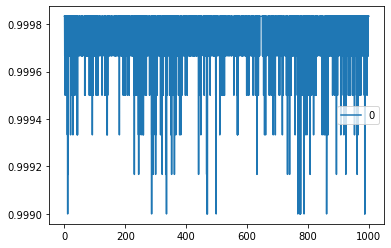

In [41]:
dfs[0].plot()



TypeError: object of type 'int' has no len()